<a href="https://colab.research.google.com/github/shyamjith94/Tensorflow_2.0/blob/master/PROJECT_9_Cifar_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import seaborn as sns
import random
import matplotlib.pyplot as plt
import datetime
import keras
from sklearn.metrics import confusion_matrix

In [34]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 

In [35]:
x_train.shape

(50000, 32, 32, 3)

In [36]:
y_train.shape

(50000, 1)

In [37]:
x_test.shape

(10000, 32, 32, 3)

In [38]:
y_test.shape

(10000, 1)

In [39]:
name_list = ["Airplanes", "Cars", "Birds", "Cats", "Deer", "Dogs", "Frogs", "Horses", "Ships", "Trucks"]

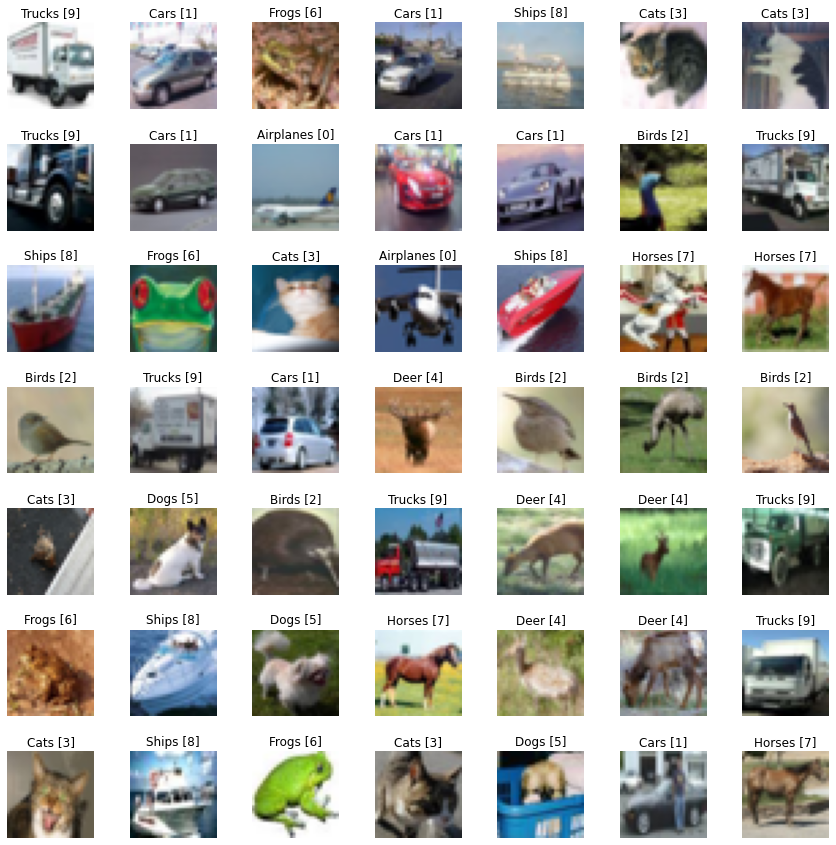

In [40]:
l = 7
w = 7
fig, axes = plt.subplots(l, w, figsize=(15, 15))
axes = axes.ravel()
n_training = len(x_train)
for i in np.arange(0, l*w):
    index = random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(name_list[y_train[index][0]] +" "+ str(y_train[index]))
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)


In [41]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [42]:
number_cat = 10
y_train = keras.utils.to_categorical(y_train, number_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
number_cat = 10
y_test = keras.utils.to_categorical(y_test, number_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [44]:
x_train = x_train/255
x_test = x_test/255

In [45]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [46]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [47]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPool2D(2, 2))
cnn.add(layers.Dropout(0.3))

cnn.add(layers.Conv2D(64, (3, 3), activation="relu"))
cnn.add(layers.Conv2D(64, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(2, 2))
cnn.add(layers.Dropout(0.3))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(1024, activation="relu"))
cnn.add(layers.Dropout(0.3))

cnn.add(layers.Dense(1024, activation="relu"))

cnn.add(layers.Dense(10, activation="softmax"))

cnn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [48]:
epochs = 100
cnn.compile(tf.keras.optimizers.RMSprop(0.0001, decay=1e-6), loss="categorical_crossentropy", metrics=["accuracy"])

In [49]:
epochs_hist = cnn.fit(x_train, y_train, epochs=epochs, batch_size=512)

Epoch 1/100
98/98 [==============================] - 5s 56ms/step - loss: 2.0645 - accuracy: 0.2316
Epoch 2/100
98/98 [==============================] - 5s 55ms/step - loss: 1.8518 - accuracy: 0.3243
Epoch 3/100
98/98 [==============================] - 5s 55ms/step - loss: 1.7491 - accuracy: 0.3649
Epoch 4/100
98/98 [==============================] - 5s 55ms/step - loss: 1.6784 - accuracy: 0.3909
Epoch 5/100
98/98 [==============================] - 5s 55ms/step - loss: 1.6235 - accuracy: 0.4112
Epoch 6/100
98/98 [==============================] - 5s 56ms/step - loss: 1.5738 - accuracy: 0.4276
Epoch 7/100
98/98 [==============================] - 5s 55ms/step - loss: 1.5282 - accuracy: 0.4481
Epoch 8/100
98/98 [==============================] - 5s 55ms/step - loss: 1.4902 - accuracy: 0.4589
Epoch 9/100
98/98 [==============================] - 5s 56ms/step - loss: 1.4546 - accuracy: 0.4748
Epoch 10/100
98/98 [==============================] - 5s 55ms/step - loss: 1.4208 - accuracy: 0.4864

In [50]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

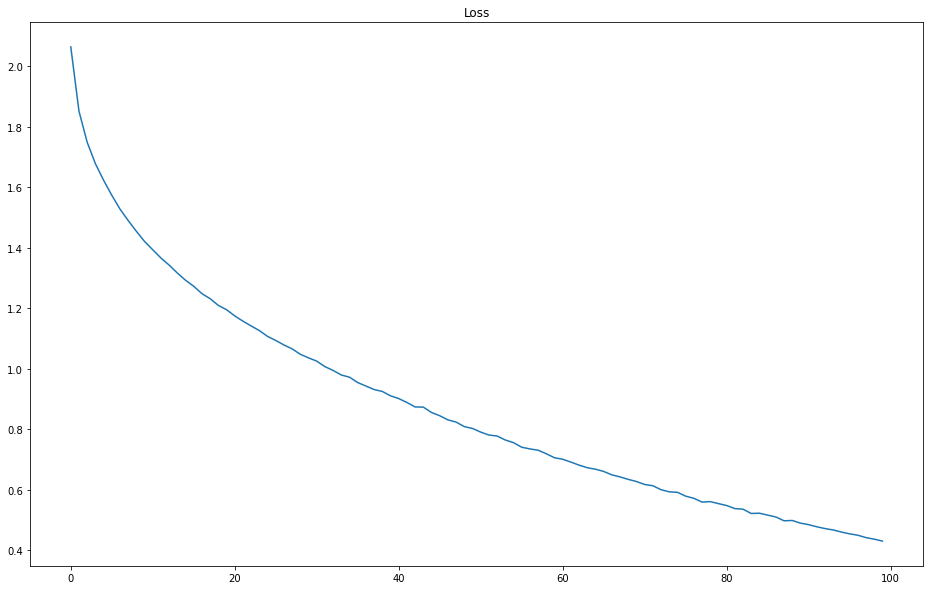

In [51]:
plt.figure(figsize=(16,10))
plt.title("Loss")
plt.plot(epochs_hist.history["loss"])

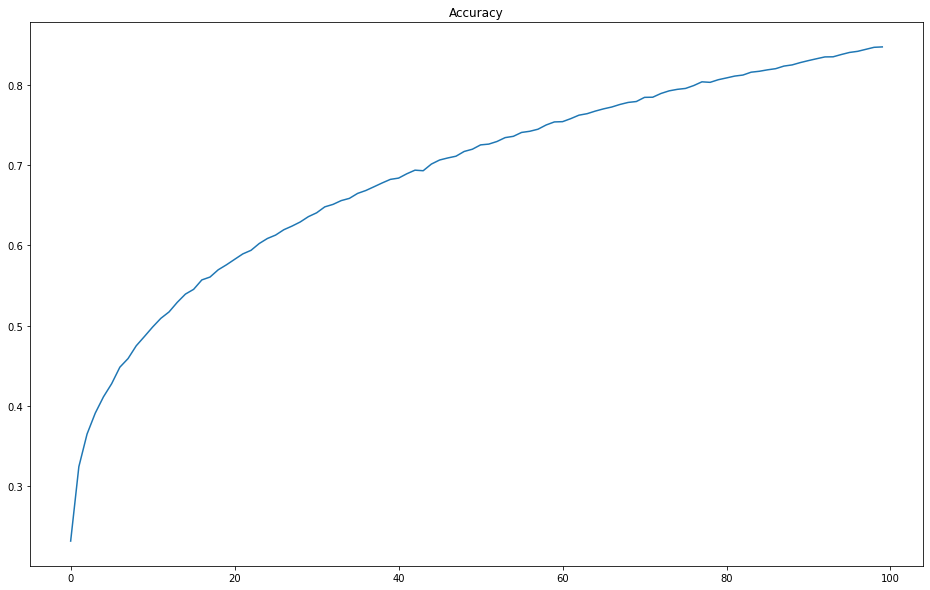

In [52]:
plt.figure(figsize=(16,10))
plt.title("Accuracy")
plt.plot(epochs_hist.history["accuracy"])

In [53]:
evaluation = cnn.evaluate(x_test, y_test)
print("Test Accuracy {}".format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.6657 - accuracy: 0.7809
Test Accuracy 0.7809000015258789


In [54]:
predict_classes = cnn.predict_classes(x_test)
predict_classes

array([3, 8, 8, ..., 5, 4, 7])

In [55]:
y_test_new = y_test.argmax(1)
y_test_new

array([3, 8, 8, ..., 5, 1, 7])

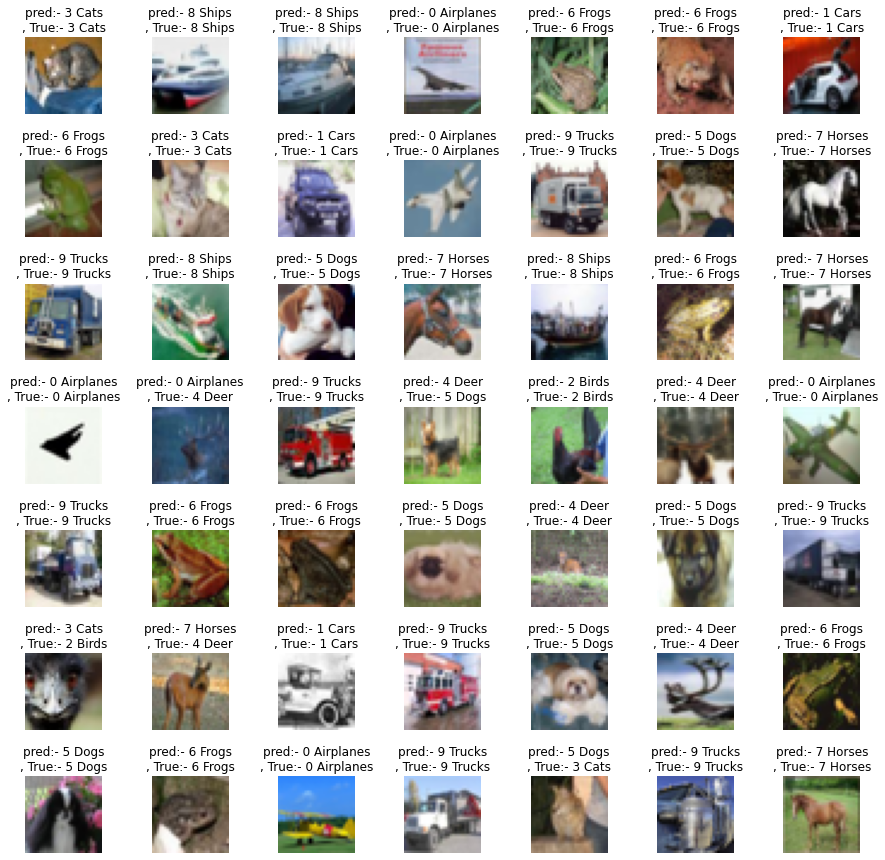

In [67]:
l = 7
w = 7
fig, axes = plt.subplots(l, w, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title("pred:- {} {}\n, True:- {} {}".format(predict_classes[i],name_list[predict_classes[i]],
                                                                  y_test_new[i], name_list[y_test_new[i]]))
    axes[i].axis("off")
plt.subplots_adjust(hspace=0.6)
plt.subplots_adjust(wspace=0.6)

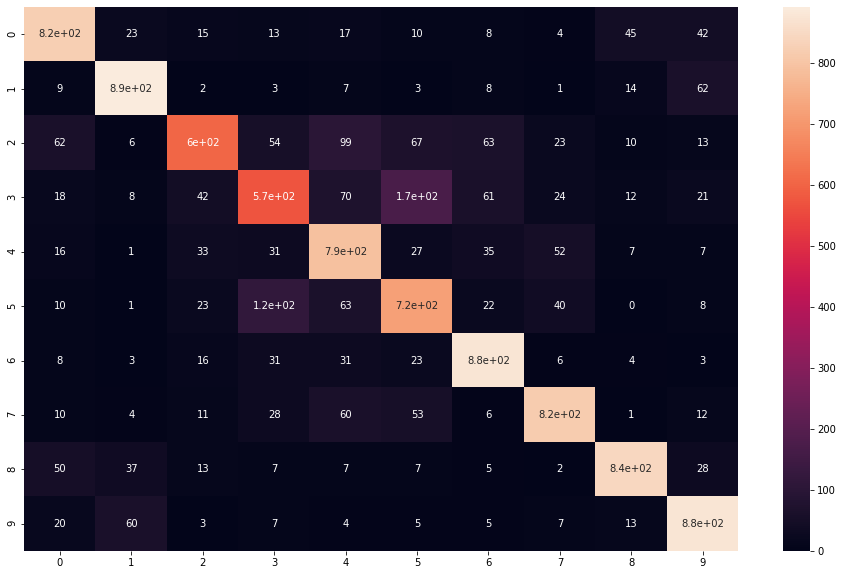

In [76]:
confu = confusion_matrix(y_test_new, predict_classes)
plt.figure(figsize=(16,10))
sns.heatmap(confu, annot=True)
